<a href="https://colab.research.google.com/github/sillHD/TAM_clase/blob/main/TAM_clase_11_09_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_regression
N = 1000 # samples
P = 20 # features

X, y = make_regression(n_samples=N, n_features=P, noise=1, random_state = 42)

print(X.shape, y.shape)



(1000, 20) (1000,)


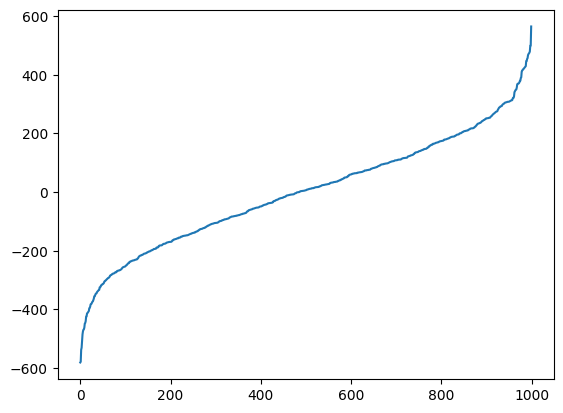

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.sort(y))
plt.show()

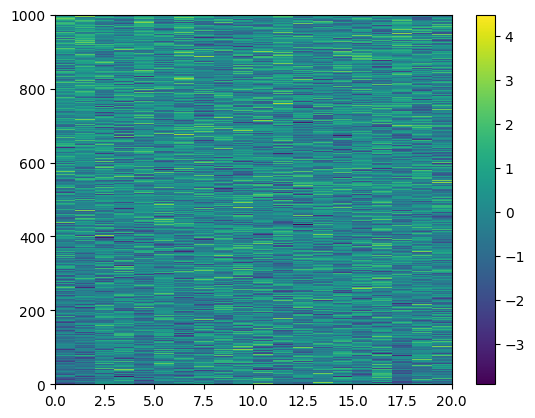

In [ ]:
ind_ = np.argsort(y)
plt.pcolormesh(X[ind_, :])
plt.colorbar()
plt.show()

In [ ]:
def mincua_reg(X, y, lamb = 1e-3): # ajustar / optimizar
  alpha = np.linalg.inv(X.T.dot(X)+lamb*np.eye(X.shape[1])).dot(X.T).dot(y)
  return alpha

[ 7.99999269e+01  9.86015897e+01  5.57286288e+00  2.41760761e-02
  8.64704289e+01 -3.94575875e-02  6.94411862e+01 -3.56275838e-03
  2.38619256e-02 -3.12145636e-02  1.86214575e+01  3.96564254e+01
  4.91812853e-03  3.10939044e+00 -4.42071056e-02  2.63860334e+01
 -2.41981026e-02  8.68971640e+01  3.51245931e-02  1.62243894e-02]


<StemContainer object of 3 artists>

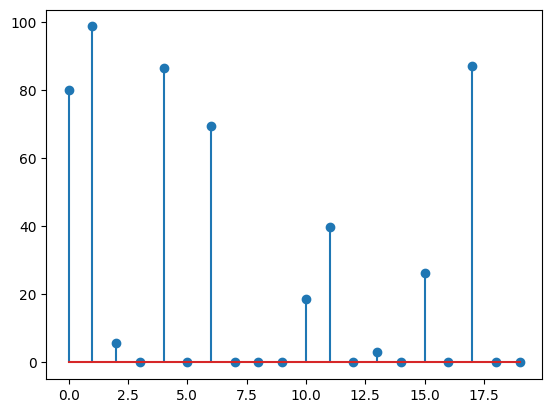

In [ ]:
alpha = mincua_reg(X, y)
print(alpha)
plt.stem(np.arange(len(alpha)), np.abs(alpha))

In [ ]:
ypred = X.dot(alpha)

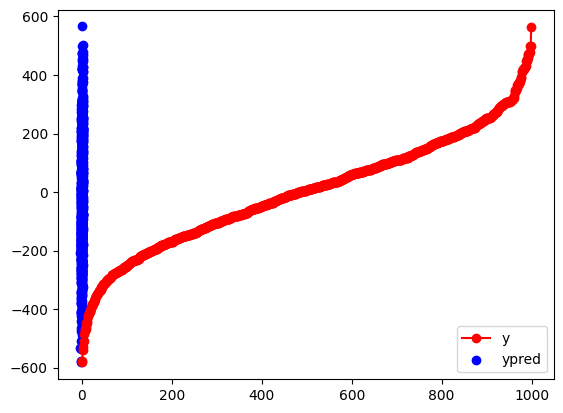

In [ ]:
plt.plot(y[ind_], color="r", marker = "o", label = "y")
plt.scatter(X[ind_, 0],ypred[ind_], color = "b", label = "ypred")
plt.legend()
plt.show()

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)
print(housing.feature_names[0:6])

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


(20640, 8) (20640,)


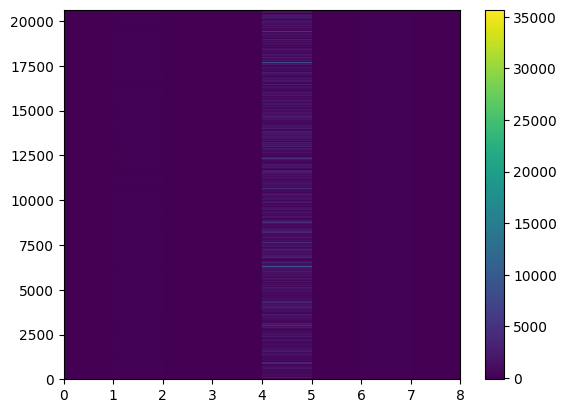

In [ ]:
X = housing.data
y = housing.target
print(X.shape, y.shape)
plt.pcolormesh(X)
plt.colorbar()
plt.show()

# Trabajo para el lunes

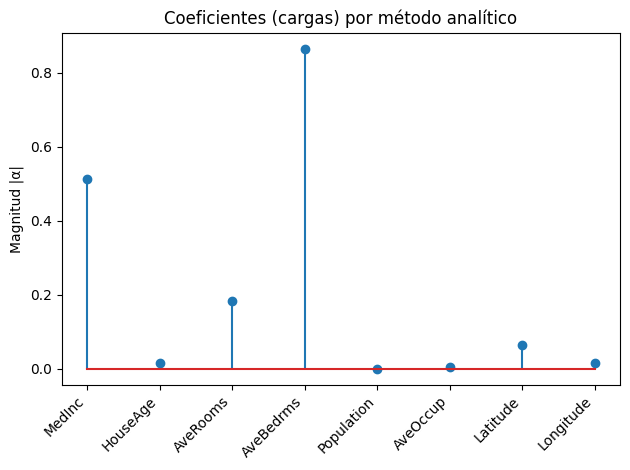

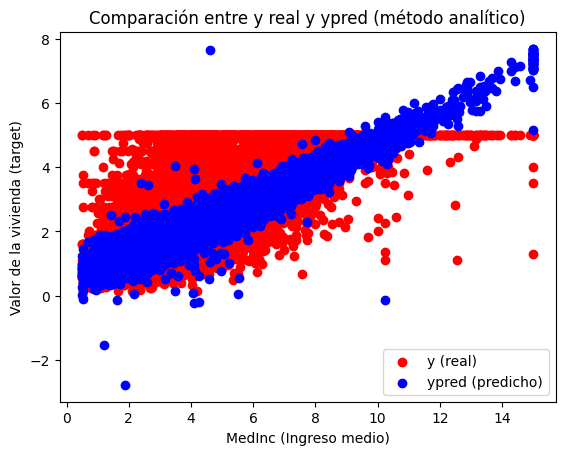

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# 1. Cargar dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target
names = housing.feature_names

# 2. Función analítica (regresión regularizada)
def mincua_reg(X, y, lamb=1e-3):
    XTX = X.T @ X
    reg = lamb * np.eye(X.shape[1])
    alpha = np.linalg.inv(XTX + reg) @ X.T @ y
    return alpha

# 3. Calcular coeficientes
alpha = mincua_reg(X, y)

# 4. Predecir con el modelo
ypred = X @ alpha

# 5. Graficar coeficientes (cargas)
plt.stem(np.arange(len(alpha)), np.abs(alpha))
plt.xticks(np.arange(len(alpha)), names, rotation=45, ha="right")
plt.title("Coeficientes (cargas) por método analítico")
plt.ylabel("Magnitud |α|")
plt.tight_layout()
plt.show()

# 6. Graficar comparación real vs predicho (usando feature MedInc)
ind_ = np.argsort(y)  # ordenar por valor de y para una mejor visualización
plt.scatter(X[ind_,0], y[ind_], c='r', marker='o', label='y (real)')
plt.scatter(X[ind_,0], ypred[ind_], c='b', label='ypred (predicho)')
plt.xlabel("MedInc (Ingreso medio)")
plt.ylabel("Valor de la vivienda (target)")
plt.legend()
plt.title("Comparación entre y real y ypred (método analítico)")
plt.show()


# 🔎 Feedback al código

### ✅ Puntos positivos
- **Claridad en los pasos**: El flujo del código está bien estructurado (carga de datos, función, cálculo, visualización).  
- **Función genérica `mincua_reg`**: Permite aplicar regularización tipo Ridge ajustando el parámetro `lamb`.  
- **Visualización doble**: Gráficas de coeficientes y comparación entre valores reales vs. predichos.  
- **Uso correcto de `numpy`**: Operaciones matriciales eficientes sin bucles innecesarios.  

---

### ⚡ Sugerencias de mejora
1. **Normalización/Escalado de datos**  
   Las variables tienen escalas muy diferentes. Usar `StandardScaler` mejora la estabilidad numérica y la interpretación.  
   ```python
   from sklearn.preprocessing import StandardScaler
   scaler = StandardScaler()
   X = scaler.fit_transform(X)


## Regresión lineal analítica en California Housing

En este ejemplo usamos la **ecuación normal** para resolver el problema de regresión lineal sobre el dataset de California Housing.  

1. **Carga del dataset**  
   - `X` contiene las 8 variables explicativas (ejemplo: ingreso medio, edad promedio de la casa, número de habitaciones, etc.).  
   - `y` es el valor medio de la vivienda en cientos de miles de dólares.  

2. **Método analítico**  
   Usamos la fórmula cerrada de mínimos cuadrados regularizados:
   $$
   \alpha = (X^T X + \lambda I)^{-1} X^T y
   $$
   donde:
   - \(\alpha\) son los coeficientes del modelo.
   - \(\lambda\) es un término de regularización pequeño para evitar problemas de inversión.

3. **Interpretación de la gráfica**  
   - Cada barra corresponde a un coeficiente \(\alpha\) asociado a una variable del dataset.  
   - La **altura** de la barra indica la **magnitud** de la influencia de esa variable sobre el precio medio de la vivienda.  
   - Si un coeficiente es **positivo**, significa que esa variable está **positivamente correlacionada** con el precio (a mayor valor de la variable, mayor precio esperado).  
   - Si es **negativo**, indica una relación **inversa** (a mayor valor de la variable, menor precio esperado).  
   - Comparando las magnitudes podemos identificar qué variables tienen mayor peso en la predicción.  

En conclusión, la gráfica de los coeficientes nos ayuda a **interpretar qué factores influyen más** en el valor de las viviendas dentro del modelo lineal.


#Gradiente descendiente

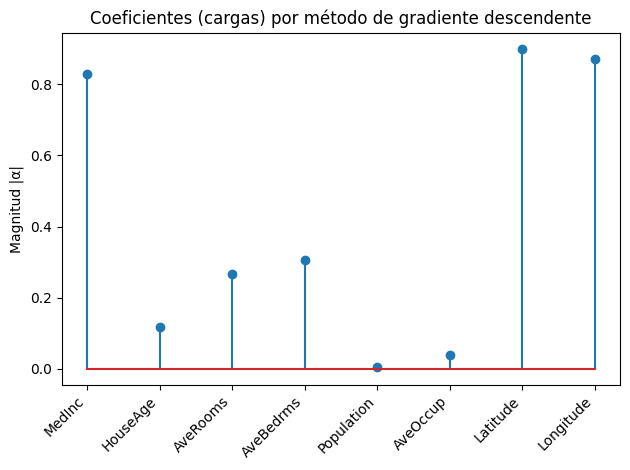

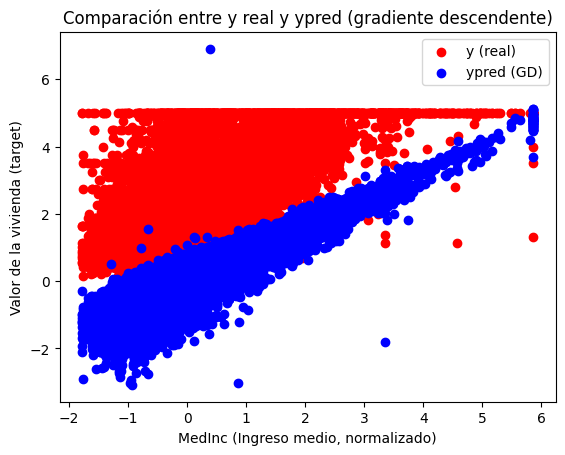

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# 1. Cargar dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target
names = housing.feature_names

# Normalización básica para mejorar convergencia
X = (X - X.mean(axis=0)) / X.std(axis=0)

# 2. Implementación de gradiente descendente
def gradiente_desc(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    alpha = np.zeros(n)  # inicializar parámetros en cero

    for _ in range(epochs):
        grad = (1/m) * X.T @ (X @ alpha - y)
        alpha -= lr * grad
    return alpha

# 3. Calcular coeficientes
alpha_gd = gradiente_desc(X, y, lr=0.1, epochs=5000)

# 4. Predicción
ypred_gd = X @ alpha_gd

# 5. Graficar coeficientes
plt.stem(np.arange(len(alpha_gd)), np.abs(alpha_gd))
plt.xticks(np.arange(len(alpha_gd)), names, rotation=45, ha="right")
plt.title("Coeficientes (cargas) por método de gradiente descendente")
plt.ylabel("Magnitud |α|")
plt.tight_layout()
plt.show()

# 6. Comparación real vs predicho usando MedInc
ind_ = np.argsort(y)
plt.scatter(X[ind_,0], y[ind_], c='r', marker='o', label='y (real)')
plt.scatter(X[ind_,0], ypred_gd[ind_], c='b', label='ypred (GD)')
plt.xlabel("MedInc (Ingreso medio, normalizado)")
plt.ylabel("Valor de la vivienda (target)")
plt.legend()
plt.title("Comparación entre y real y ypred (gradiente descendente)")
plt.show()


# 🔎 Feedback al código (Gradiente Descendente)

### ✅ Puntos positivos
- **Normalización previa**: Muy buena práctica para mejorar la convergencia del algoritmo.  
- **Implementación clara**: La función `gradiente_desc` está bien estructurada, con inicialización de parámetros, cálculo de gradiente y actualización.  
- **Parámetros configurables**: Permites ajustar `lr` (learning rate) y `epochs`, lo que facilita experimentar.  
- **Visualizaciones útiles**: Incluyes tanto la magnitud de coeficientes como la comparación entre valores reales y predichos.  

---

### ⚡ Sugerencias de mejora
1. **Intercepto (bias)**  
   Actualmente no se incluye un término independiente. Se puede añadir una columna de unos a `X`:  
   ```python
   X = np.c_[np.ones(X.shape[0]), X]


## Ventajas del gradiente descendente sobre la solución analítica

Cuando resolvemos problemas de regresión lineal, existen dos enfoques principales:  
- **Solución analítica (ecuación normal)**: usa la fórmula cerrada  
  $$
  \alpha = (X^TX)^{-1}X^Ty
  $$
- **Gradiente descendente (GD)**: ajusta los parámetros de manera iterativa siguiendo el gradiente de la función de costo.  

### 🔹 Ventajas del gradiente descendente
1. **Escalabilidad en grandes datasets**  
   - La inversión de matriz \((X^TX)^{-1}\) cuesta aproximadamente **O(n³)**, lo que es ineficiente con miles o millones de features.  
   - GD escala mejor, con complejidad **O(n·m)** por iteración.  

2. **Uso eficiente de memoria y datos**  
   - GD puede entrenarse en **mini-lotes (mini-batches)** o incluso ejemplo por ejemplo (**SGD**), lo que permite trabajar con datasets enormes que no caben en memoria.  

3. **Aplicable a modelos no lineales**  
   - La solución analítica solo existe para problemas lineales.  
   - En modelos más complejos (ej. redes neuronales), el GD es prácticamente la única opción.  

4. **Flexibilidad**  
   - GD se adapta fácilmente a diferentes formas de regularización o funciones de costo, basta con modificar el gradiente.  

5. **Trade-off tiempo vs precisión**  
   - GD permite detenerse antes de la convergencia si necesitamos una solución “suficientemente buena”.  
   - La solución analítica siempre busca el valor exacto, que puede ser costoso de calcular en datasets grandes.  

### 🔹 Comparación rápida

| Método | Pros | Contras |
|--------|------|---------|
| **Analítico (ecuación normal)** | Solución exacta, rápido en datasets pequeños | No escala con muchas features, requiere invertir matrices grandes |
| **Gradiente descendente** | Escalable, usable en big data y redes neuronales, adaptable | Aproximado, depende de hiperparámetros (learning rate, epochs) |

**Conclusión:**  
- Si el dataset es **pequeño**, conviene usar la **solución analítica**.  
- Si el dataset es **grande** o el modelo es **no lineal**, el **gradiente descendente** es la mejor (o única) alternativa.
